In [1]:
%run prophet_funcs_v1.py

In [130]:
import pandas as pd
import time
from datetime import timedelta

#get the time now in unix time
now = int(time.time())

#get the time one year from now datetime object
day_lag = datetime.today() - timedelta(days = 120 )

#convert datetime object to unix timestamp
then = int(day_lag.timestamp())

url = {
    'SOL': F'https://query1.finance.yahoo.com/v7/finance/download/SOL1-USD?period1={then}&period2={now}&interval=1d&events=history&includeAdjustedClose=true',
    'ETH': F'https://query1.finance.yahoo.com/v7/finance/download/ETH-USD?period1={then}&period2={now}&interval=1d&events=history&includeAdjustedClose=true',
    'XRP': F'https://query1.finance.yahoo.com/v7/finance/download/XRP-USD?period1={then}&period2={now}&interval=1d&events=history&includeAdjustedClose=true',
    'BTC': F'https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1={then}&period2={now}&interval=1d&events=history&includeAdjustedClose=true'
}




In [1]:
'''Function to fetch data from yahoo via url dictionary of Ticker and Url'''

def fetchData(url):
    df = pd.DataFrame()
    for i in url.items():
        key = i[0] #get the Key values from dictionary in this case Crypto Ticker
        val = i[1] #get the Value object from dictionary in this case Crypto Url
        data = pd.read_csv(val)
        data = data.assign(token = key) 
        df = df.append(data)
    return(df)


#df2 = fetchData(url)

# Try yFinance yahoo api

In [2]:
'''
Return data frame
'''

import yfinance as yf
import pandas as pd

tickerStrings = ['SOL1-USD','BTC-USD']

#start = 
period = '1mo'

vars = tickerStrings,period

def FetchData(vars):
    tickerStrings,period = vars
    df_list = list()
    for ticker in tickerStrings:
        data = yf.download(ticker, group_by="Ticker", period = period)
        data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
        df_list.append(data)
        df = pd.concat(df_list) # combine all dataframes into a single dataframe
    return(df)
                                

df = FetchData(vars)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
sample_dict['BTC-USD'].tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-03,63254.335938,63516.937500,61184.238281,62970.046875,62970.046875,36124731509
2021-11-04,62941.804688,63123.289062,60799.664062,61452.230469,61452.230469,32615846901
2021-11-05,61460.078125,62541.468750,60844.609375,61125.675781,61125.675781,30605102446
2021-11-06,61068.875000,61590.683594,60163.781250,61527.480469,61527.480469,29094934221
2021-11-07,61528.199219,63101.496094,61432.488281,63052.953125,63052.953125,24366667776


# Start Here!

# Python Widgets for plots

In [24]:
import ipywidgets as ipyw
import yfinance as yf
import pandas as pd

#df_dict = {}

@ipyw.interact_manual (
tickerStrings= ipyw.widgets.SelectMultiple(
    options= ['SOL1-USD','BTC-USD','ETH-USD','1INCH-USD','ADA-USD'],
    value= ['SOL1-USD','BTC-USD','ETH-USD','1INCH-USD','ADA-USD']),
period= ['1d','5d','1mo','3mo','6mo','1y','2y','5y','10y','ytd','max']
)



def FetchData_dict(tickerStrings,period):
    global df_dict
    df_list = list()
    for ticker in tickerStrings:
        data = yf.download(ticker, group_by="Ticker", period = period)
        data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
        df_list.append(data)
        df = pd.concat(df_list) # combine all dataframes into a single dataframe
        df_dict = {value: df[df['ticker'] == value].drop('ticker', axis=1) for value in df['ticker'].unique()}



interactive(children=(SelectMultiple(description='tickerStrings', index=(0, 1, 2, 3, 4), options=('SOL1-USD', …

In [26]:
import ipywidgets as ipyw
import mplfinance as mpf

tickers = list(df_dict)

@ipyw.interact (
Mavg = ipyw.widgets.Dropdown(options=[('5Day', 5), ('10Day', 10), ('30Day', 30)],description='Moving_Average:'),
MA = True,
Tickers = tickers,
Plot_Type = ['hollow_and_filled','ohlc','line','renko','pnf']
)

def PlotIt(Tickers,Plot_Type,MA,Mavg):
    if MA == True:
      Mavg
      mpf.plot(df_dict[Tickers],type = Plot_Type,volume = True,mav = Mavg,figratio = (100,40),style = 'yahoo',title = (Tickers + ' Plot With Moving Average'))
    else:
      mpf.plot(df_dict[Tickers],type = Plot_Type,volume = True,figratio = (100,40),style = 'yahoo',title = Tickers)
        

interactive(children=(Dropdown(description='Tickers', options=('SOL1-USD',), value='SOL1-USD'), Dropdown(descr…

# Create close dataframe

In [27]:
#Create DataFrame from close data
import pandas as pd

close = pd.DataFrame()

for a in df_dict:
    cl = pd.DataFrame(df_dict[a],columns=['Close'])
    cl = cl.rename(columns={'Close': a }).reset_index(level=0).set_index('Date')
    close = pd.concat([close,cl],axis = 1)

close = close.reset_index(level = 0)


# Compare All returned data
Scale close data and scale so that trend can be observed between each stock

In [29]:
#Scale close data

from sklearn.preprocessing import StandardScaler
import plotly.express as px

scaler = StandardScaler()

v = close.iloc[:, 1:] #Ignore Date column and grab all others
d = pd.DataFrame(close['Date']) #Get Date Column
c_scaled = pd.DataFrame(scaler.fit_transform(v)) # Scale close data
t = list(close.iloc[:0, 1:]) #get column names(tickers) from original data
c_scaled = c_scaled.set_axis(t, axis = 1) #reset column names after scaling
close_scaled = pd.concat([d,c_scaled], axis = 1) #combine data into new dataframe

#df = px.data.stocks()
fig = px.line(close_scaled, x="Date", y=close_scaled.columns,
              hover_data={"Date": "|%B %d, %Y"},
              title='custom tick labels')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

# Preprocessing
Preprocessing of close data for trainning and prediction with Meta Prophet 

In [30]:
@ipyw.interact_manual (Tickers = tickers)

def munge(Tickers):
    global df
    df = close[['Date',Tickers]]   #Create new dataframe with Date and Ticker columns based on selected ticker
    df = df.rename(columns={'Date':'ds', Tickers: 'y'}) #rename columns
    df = df.dropna()#remove nan values
    df = datecheck(df)
    return(df.head())

interactive(children=(Dropdown(description='Tickers', options=('SOL1-USD',), value='SOL1-USD'), Button(descrip…

# Quick Prediction

In [7]:
from prophet import Prophet
m = Prophet() #Create Prophet object
m.fit(df) #Fit Prophet model
future = m.make_future_dataframe(periods=90) #Create future dataframe
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.99032


,ds
257,2022-06-04
258,2022-06-05
259,2022-06-06
260,2022-06-07
261,2022-06-08


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        322.69   9.75211e-07       93.0735      0.2903           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       322.691   6.19688e-06       95.4617   6.696e-08       0.001      169  LS failed, Hessian reset 
     139       322.691   1.66875e-08       83.0421           1           1      205   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
257,2022-06-04,0.302914,0.131535,0.439927
258,2022-06-05,0.307051,0.149429,0.462129
259,2022-06-06,0.309814,0.147399,0.457066
260,2022-06-07,0.334997,0.180768,0.503706
261,2022-06-08,0.308817,0.149132,0.452932


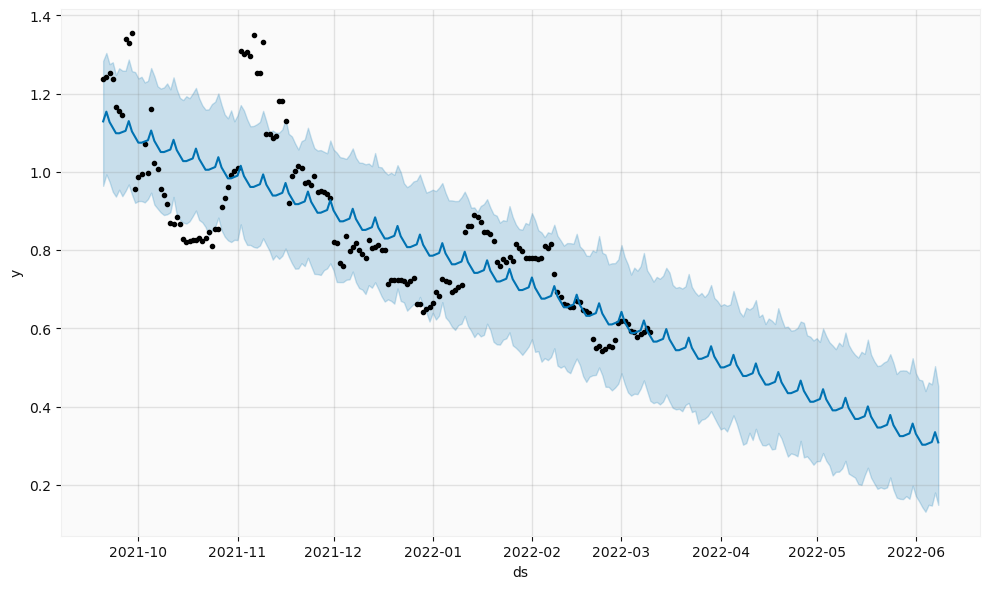

In [9]:
fig1 = m.plot(forecast)

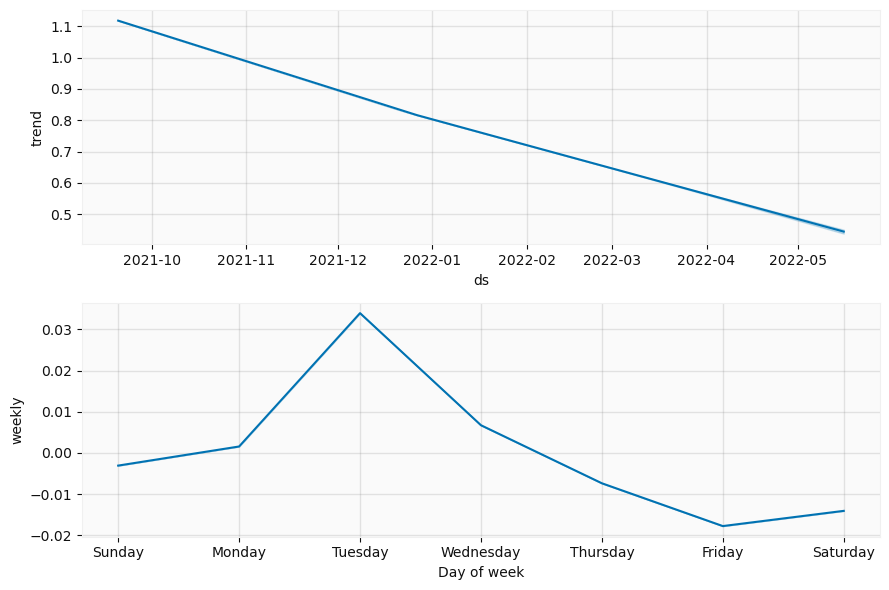

In [25]:
fig2 = m.plot_components(forecast)


# Cross Validation and tuning

In [32]:
import itertools
import numpy as np
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here



In [33]:
# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-12-26 00:00:00 and 2022-02-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc761789730>


Initial log joint probability = -3.00726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      72       289.699   7.81862e-08       4683.22    1.48e-11       0.001      141  LS failed, Hessian reset 
      76         289.7   9.67685e-09       5357.08      0.4261      0.4261      145   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -2.72964
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -2.72964             0       115.697       1e-12       0.001       26   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = 65.6304
Iteration  1. Log joint probability =    139.247. Improved by 73.6169.
Iteration  2. Log joint probability =    182.022. Improved by 42.7751.

Initial log joint probability = 79.446


Iteration 14. Log joint probability =    165.872. Improved by 0.00638702.
Iteration  4. Log joint probability =    220.206. Improved by 0.903415.
Iteration 17. Log joint probability =    197.332. Improved by 0.00133636.
Iteration 15. Log joint probability =    165.886. Improved by 0.0145173.
Iteration  5. Log joint probability =        225. Improved by 4.79472.
Iteration 18. Log joint probability =    197.333. Improved by 0.00158441.
Iteration 16. Log joint probability =    165.893. Improved by 0.00629821.
Iteration  6. Log joint probability =    225.078. Improved by 0.0772795.
Iteration 19. Log joint probability =    197.334. Improved by 0.000869637.
Iteration 17. Log joint probability =      165.9. Improved by 0.00720749.
Iteration  7. Log joint probability =    225.114. Improved by 0.0365692.
Iteration 20. Log joint probability =    197.335. Improved by 0.000676328.
Iteration 18. Log joint probability =      165.9. Improved by 0.00021957.
Iteration  8. Log joint probability =     22

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-12-26 00:00:00 and 2022-02-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc761ca5f40>


Initial log joint probability = -3.00726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      66       290.215   8.00922e-09       4833.98       0.666       0.666       89   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -2.72964
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -2.72964             0       115.697       1e-12       0.001       26   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = 51.8148
Iteration  1. Log joint probability =    139.751. Improved by 87.9363.
Iteration  2. Log joint probability =    183.366. Improved by 43.6146.

Initial log joint probability = 65.6304
Iteration  3. Log joint probability =    189.322. Improved by 5.95671.
Iteration  1. Log joint probability =  

Iteration 14. Log joint probability =    166.561. Improved by 0.00174285.
Iteration  8. Log joint probability =    225.883. Improved by 0.0511998.
Iteration 17. Log joint probability =    197.994. Improved by 0.0348336.
Iteration 15. Log joint probability =    166.564. Improved by 0.00277305.
Iteration  9. Log joint probability =    225.905. Improved by 0.022433.
Iteration 18. Log joint probability =    198.005. Improved by 0.0108897.
Iteration 16. Log joint probability =    166.568. Improved by 0.00378697.
Iteration 10. Log joint probability =    225.932. Improved by 0.0270862.
Iteration 19. Log joint probability =    198.025. Improved by 0.0208409.
Iteration 17. Log joint probability =    166.568. Improved by 0.000396116.
Iteration 11. Log joint probability =     225.94. Improved by 0.00737148.
Iteration 20. Log joint probability =     198.03. Improved by 0.00490248.
Iteration 18. Log joint probability =    166.574. Improved by 0.00584144.
Iteration 12. Log joint probability =    225

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-12-26 00:00:00 and 2022-02-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc75202f1f0>


Initial log joint probability = -3.00726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      67       290.237    3.1763e-07       4929.15   6.775e-11       0.001      122  LS failed, Hessian reset 
      79       290.238   7.07409e-09       4553.84      0.3399           1      136   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance

Initial log joint probability = 51.8149
Iteration  1. Log joint probability =    11.4466. Improved by -40.3683.
Iteration  2. Log joint probability =    56.9617. Improved by 45.5151.
Iteration  3. Log joint probability =     85.575. Improved by 28.6133.
Iteration  4. Log joint probability =    88.5402. Improved by 2.96518.
Initial log joint probability = -2.95778
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  5. Log joint probability =    92.3426. Improved by 3.80241.
      64       231.663    3.4541e-

Iteration 31. Log joint probability =    166.749. Improved by 0.00575286.
Iteration  8. Log joint probability =    225.919. Improved by 0.0511679.
Iteration  4. Log joint probability =    195.808. Improved by 6.11938.
Iteration 32. Log joint probability =    166.751. Improved by 0.00202656.
Iteration 33. Log joint probability =    166.752. Improved by 0.000835878.
Iteration  9. Log joint probability =    225.941. Improved by 0.0219224.
Iteration  5. Log joint probability =    197.668. Improved by 1.86007.
Iteration 34. Log joint probability =    166.753. Improved by 0.000514735.
Iteration 35. Log joint probability =    166.753. Improved by 0.000113749.
Iteration 36. Log joint probability =    166.753. Improved by 0.000262011.
Iteration  6. Log joint probability =    197.737. Improved by 0.0694145.
Iteration 10. Log joint probability =    225.968. Improved by 0.0269253.
Iteration 37. Log joint probability =    166.753. Improved by 6.57477e-06.
Iteration 38. Log joint probability =    16

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-12-26 00:00:00 and 2022-02-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc761ca5460>


Initial log joint probability = -3.00726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       290.239   8.07306e-08       4783.11   1.587e-11       0.001      149  LS failed, Hessian reset 
      94        290.24   9.43956e-09       4708.49      0.5075      0.5075      157   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -2.72964
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -2.72964             0       115.697       1e-12       0.001       26   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = 24.1838
Iteration  1. Log joint probability =    139.819. Improved by 115.635.
Iteration  2. Log joint probability =    186.293. Improved by 46.4742.

Initial log joint probability = 37.9994

Iteration 16. Log joint probability =    142.433. Improved by 1.8879.
Iteration 17. Log joint probability =    147.838. Improved by 5.40466.
Iteration 17. Log joint probability =     198.08. Improved by 0.000228371.
Iteration 18. Log joint probability =    161.013. Improved by 13.1753.
Iteration  4. Log joint probability =    220.977. Improved by 0.769963.
Iteration 19. Log joint probability =    161.337. Improved by 0.323858.
Iteration 20. Log joint probability =    162.002. Improved by 0.664543.
Iteration 18. Log joint probability =     198.08. Improved by 0.000170506.
Iteration  5. Log joint probability =    225.752. Improved by 4.77476.
Iteration 21. Log joint probability =    164.526. Improved by 2.52458.
Iteration 22. Log joint probability =    165.595. Improved by 1.06857.
Iteration 19. Log joint probability =     198.08. Improved by 0.000212327.
Iteration 23. Log joint probability =    166.177. Improved by 0.582716.
Iteration  6. Log joint probability =    225.827. Improved by 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-12-26 00:00:00 and 2022-02-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc761783520>


Initial log joint probability = -3.00726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       324.657   2.40468e-05       436.027           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     145       324.716   3.58711e-05       512.348   7.172e-08       0.001      224  LS failed, Hessian reset 
     199       324.734   7.18851e-08       512.124           1           1      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       324.734   2.06624e-09       441.629      0.1979      0.1979      300   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance

Initial log joint probability = 21.8813
Iteration  1. Log joint probability =    46.7877. Improved by 24.9063.
Iteration  2. Log joint probability =    134.914. Improved by 88.1264.
Iteration  3. Log joint

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-12-26 00:00:00 and 2022-02-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc7618a8040>


Initial log joint probability = -3.00726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96        324.49   1.26221e-05       558.674   2.657e-08       0.001      159  LS failed, Hessian reset 
      99       324.493   9.31428e-07       433.773      0.3402      0.3402      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       324.495   9.72158e-09       449.391      0.2899      0.2899      192   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance

Initial log joint probability = 8.06582
Iteration  1. Log joint probability =    44.0811. Improved by 36.0153.
Iteration  2. Log joint probability =    135.556. Improved by 91.4754.
Iteration  3. Log joint probability =    162.822. Improved by 27.2653.
Initial log joint probability = -3.0193
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-12-26 00:00:00 and 2022-02-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc761757790>


Initial log joint probability = -3.00726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       324.633   1.32832e-07       483.463      0.7157      0.7157      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       324.633   8.56572e-09       485.568      0.3638      0.3638      129   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -2.72964
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       196.889   4.61719e-06       476.901   9.052e-09       0.001      165  LS failed, Hessian reset 
      99       196.889   9.09595e-07       445.204      0.4933      0.4933      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111        196.89   7.87145e-09       467.442      0.1953      0.195

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-12-26 00:00:00 and 2022-02-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc700188be0>


Initial log joint probability = -3.00726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       324.361   3.46092e-06       511.868       0.827       0.827      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114        324.37   2.07206e-05       508.535   4.038e-08       0.001      186  LS failed, Hessian reset 
     146       324.377   9.74922e-09        430.36      0.1964      0.8224      224   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -2.72964
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      72        196.88   3.33927e-09         476.4      0.4902      0.4902       97   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -2.95778
    Iter      log p

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-12-26 00:00:00 and 2022-02-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc761778310>


Initial log joint probability = -3.00726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       324.969   1.04028e-06       38.4956      0.1351      0.1351      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       324.969   9.12388e-09       35.3851     0.09579     0.09579      171   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -2.72964
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        208.89     0.0138121       41.2742       0.905       0.905      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       211.246   0.000155908       28.0104      0.7008      0.1646      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-12-26 00:00:00 and 2022-02-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc7618a8100>


Initial log joint probability = -3.00726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       325.483   2.03724e-06       23.6579      0.6243      0.6243      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       325.483   1.12314e-08        27.547     0.03948           1      184   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance

Initial log joint probability = -49.4988
Iteration  1. Log joint probability =    44.0924. Improved by 93.5912.
Iteration  2. Log joint probability =    136.104. Improved by 92.0114.
Initial log joint probability = -2.95778
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  3. Log joint probability =     136.14. Improved by 0.0357944.
      69       260.884    0.00263304       34.0846   7.154e-05       0.001      135  LS failed, Hessian r

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-12-26 00:00:00 and 2022-02-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc761778d90>


Initial log joint probability = -3.00726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       325.483    5.8077e-07       40.3051      0.2014     0.02014      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       325.483   1.23094e-08       32.9737     0.03746           1      184   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance

Initial log joint probability = -63.3143
Iteration  1. Log joint probability =     11.454. Improved by 74.7683.
Iteration  2. Log joint probability =    11.7011. Improved by 0.247044.
Initial log joint probability = -2.72964
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  3. Log joint probability =     11.765. Improved by 0.0639519.
      99       210.806    0.00380337       44.0297      0.6736      0.6736      127   
    Iter      log

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-12-26 00:00:00 and 2022-02-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc7704c2850>


Initial log joint probability = -3.00726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       325.482   1.83227e-06       33.5204      0.1607      0.1607      144   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       325.482   4.63882e-08        30.629      0.3496           1      186   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -3.0193
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       227.355   7.02796e-06       30.8723      0.3476           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     160       227.584   0.000236541       41.1806   6.116e-06       0.001      239  LS failed, Hessian reset 
     199       227.589   7.22477e-08       28.1076      0.4295           

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-12-26 00:00:00 and 2022-02-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc76176daf0>


Initial log joint probability = -3.00726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       392.873     0.0137213       47.5294       1.936      0.1936      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       412.272     0.0295711       39.3636           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       418.458    0.00626764       62.1548           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       422.834    0.00196309       22.9463      0.4154           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       423.715    0.00419711       16.7907           1           1      594   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-12-26 00:00:00 and 2022-02-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc761783ca0>


Initial log joint probability = -3.00726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        399.03    0.00577595       122.553           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       413.804     0.0373634       18.1653           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       417.973    0.00261704       26.0579           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       423.861    0.00496488       33.2589           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       424.961   0.000279617       9.94944           1           1      596   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-12-26 00:00:00 and 2022-02-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc76188f580>


Initial log joint probability = -3.00726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        394.91     0.0305037       305.265     0.01522           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        414.05     0.0147007       45.8176      0.4179           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       419.767     0.0678939       59.6597        1.27       0.127      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       424.004    0.00540046       12.6471           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499         425.1   0.000596515       14.4132      0.5458      0.5458      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-12-26 00:00:00 and 2022-02-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc761e3bc40>


Initial log joint probability = -3.00726
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       394.326     0.0750957       115.403           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       410.999     0.0204626       109.438      0.6441      0.6441      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       416.301    0.00756771       38.8156       1.463      0.1463      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       422.696     0.0242455       248.674      0.4405           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       424.862     0.0151702       57.0496      0.7755      0.7755      596   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [34]:
# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  0.124479
1                     0.001                     0.10  0.125463
2                     0.001                     1.00  0.125737
3                     0.001                    10.00  0.125530
4                     0.010                     0.01  0.130346
5                     0.010                     0.10  0.128421
6                     0.010                     1.00  0.129968
7                     0.010                    10.00  0.131592
8                     0.100                     0.01  0.238220
9                     0.100                     0.10  0.215505
10                    0.100                     1.00  0.236880
11                    0.100                    10.00  0.222780
12                    0.500                     0.01  0.205360
13                    0.500                     0.10  0.203320
14                    0.500                     1.00  0

In [35]:
#from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,0.012820,0.113226,0.099664,0.131473,0.128840,0.133633,0.333333
1,4 days,0.016647,0.129024,0.107488,0.139715,0.136600,0.144582,0.416667
2,5 days,0.018969,0.137729,0.111741,0.143229,0.136164,0.149327,0.416667
3,6 days,0.019984,0.141366,0.113936,0.144693,0.149302,0.150317,0.333333
4,7 days,0.018791,0.137079,0.113682,0.145301,0.162152,0.148792,0.250000
5,8 days,0.016406,0.128086,0.108931,0.140976,0.164375,0.142073,0.250000
6,9 days,0.015511,0.124544,0.107928,0.140974,0.160486,0.141640,0.250000
7,10 days,0.015311,0.123737,0.109265,0.144323,0.160486,0.145596,0.250000
8,11 days,0.017060,0.130614,0.118423,0.162782,0.157339,0.162560,0.333333
9,12 days,0.018631,0.136494,0.126861,0.182743,0.158447,0.178276,0.416667


In [36]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}


In [39]:
best_params['seasonality_prior_scale']

0.01